In [1]:
import copy

from alns import ALNS, State
from vrp.vrp import VRP
from vrp.vrp_edge import VRPEdge
import random

from vrp.vrp_node import VRPNode

In [19]:
class CvrpState(State):
    """
    Solution state for CVRP.
    """

    def __init__(self, vrp, routes, unassigned=None):
        self.vrp = vrp
        self.routes = routes
        self.unassigned = unassigned if unassigned is not None else []

    def copy(self):
        return CvrpState(copy.deepcopy(self.vrp), copy.deepcopy(self.routes), self.unassigned.copy())

    def objective(self):
        """
        Computes the total route costs.
        """
        return sum(self.route_cost(route) for route in self.routes)

    @property
    def cost(self):
        """
        Alias for objective method. Used for plotting.
        """
        return self.objective()

    def find_route(self, node: VRPNode):
        """
        Return the route that contains the passed-in node.
        """
        for route in self.routes:
            if node in route:
                return route

        raise ValueError(f"Solution does not contain node {node}.")

    def route_cost(self, route: list[(VRPNode, VRPNode)]):
        """
        Computes the cost of a single route.
        """
        cost = 0
        for node1, node2 in route:
            edge = self.vrp.find_edge_from_nodes[(node1, node2)]
            cost += edge.cost
        return cost

In [20]:
def get_initial_solution(vrp: VRP):
    """
    Returns an initial solution for the passed-in VRP instance.
    """
    # initialize routes
    routes = []
    unvisited = vrp.customers.copy()
    # while there are unvisited nodes
    while unvisited:
        # create a new route
        route = []
        # select the nearest node to the depot
        node = random.choice(unvisited)
        # add the node to the route
        route.append((vrp.depot, node))
        # remove the node from the unvisited nodes
        unvisited.remove(node)
        # while the route is not full
        while sum(vrp.demands[node] for (_, node) in route) < vrp.capacity and unvisited:
            # select a random node from the unvisited nodes
            node = random.choice(unvisited)
            # add the node to the route
            route.append((route[-1][1], node))
            # remove the node from the unvisited nodes
            unvisited.remove(node)
        # add the depot to the route
        route.append((route[-1][1], vrp.depot))
        # add the route to the routes
        routes.append(route)

    return CvrpState(vrp, routes)

class HeuristicSolver:

    def __init__(self, vrp: VRP):
        self.vrp = vrp
        self.alns = ALNS()
        self.initial_solution = get_initial_solution(vrp)
        self.state = self.initial_solution.copy()

    def solve(self, max_iter=1000):
        """
        Solves the VRP instance using the ALNS heuristic.
        """
        pass

    def get_active_arcs(self):
        """
        Returns a list of all arcs that are currently in use.
        """
        arcs = []
        for route in self.state.routes:
            for node1, node2 in route:
                arcs.append((node1, node2))
        return arcs

    def get_routes(self):
        """
        Returns a list of current routes.
        """
        return self.state.routes

In [29]:
from util import parse_datafile

all_vrp_instances = [parse_datafile(f'../data/v3_100_50_2_1/instance_{i}') for i in range(10)]

In [33]:
test = all_vrp_instances[0]

In [34]:
solver = HeuristicSolver(test)

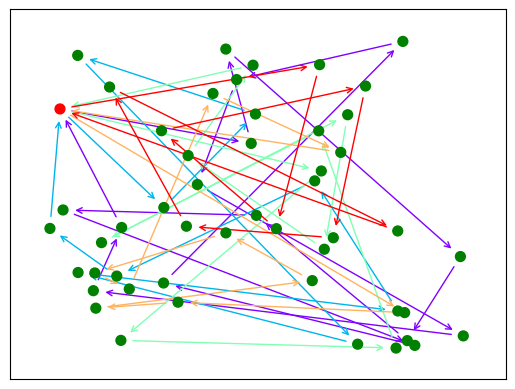

In [35]:
from util import draw_solution

draw_solution(solver)

In [36]:
solver.state.objective()

309.09230131050873

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16
Set parameter MIPGap to value 0


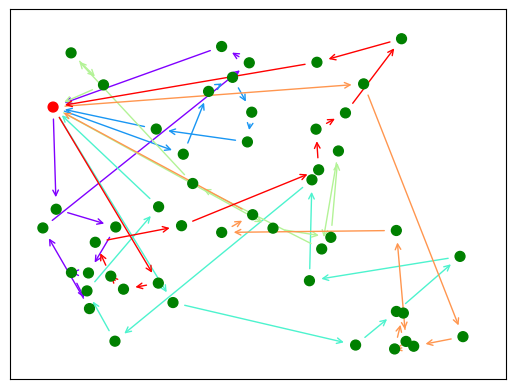

In [37]:
from solver import GurobiSolver

# best solution with gurobi
gurobi = GurobiSolver(test, mip_gap=0)
gurobi.solve()
draw_solution(gurobi)

In [39]:
gurobi.get_obj_val()

202.64115253966352

# Destroy operators

In [ ]:
def random_removal(state: CvrpState, k=1):
    """
    Removes k random nodes from the solution.
    """
    destroyed = state.copy()
    for _ in range(k):


    return remove_empty_routes(destroyed)


def remove_empty_routes(state):
    """
    Remove empty routes after applying the destroy operator.
    """
    state.routes = [route for route in state.routes if len(route) != 0]
    return state